# To Explore Unsupervised Learning

## Unsupervised Learning 
   Unsupervise Learning is used to draw inferences from data consisting of input data without labeled responses. The most common unsupervised learning method is **Cluster Analysis**.

### Cluster Anlysis:
Clustering basically means the following:
* Creating a group with a high similarity among the members of clusters (low intra-cluster distance)
* Creating a group with a significant distinction or dissimilarity between the members of two different clusters (high inter-cluster distance)

The clustering algorithms work on calculating the similarity or dissimilarity between
the observations to group them in clusters.

## Clustering using K-Means

k-means clustering is one of the most common clustering techniques. In k-means clustering, the algorithm attempts to group observations into k groups, with each group having roughly equal variance. The number of groups, k, is specified by the user as a hyperparameter. Specifically, in k-means:

1. k cluster “center” points are created at random locations.
2. For each observation:
    a. The distance between each observation and the k center points is calculated.
    b. The observation is assigned to the cluster of the nearest center point.
3. The center points are moved to the means (i.e., centers) of their respective clusters.
4. Steps 2 and 3 are repeated until no observation changes in cluster membership.
At this point the algorithm is considered converged and stops.

## Setting up Libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Importing Iris Dataset from Sklearn datasets

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data.shape

(150, 4)

In [3]:
#Species Variable
species=pd.Series(iris.target)
species=pd.DataFrame({'Species':species.map({0:'setosa',1:'versicolor',2:'virginica'})})

In [4]:
#Iris dataset
iris_data=pd.concat([iris_data,species],axis=1)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X=iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Using the elbow method to find the optimal number of clusters

Elbow method is a graph used to find the optimal number of clusters(k). Optimal K can be achieved by plotting Number of clusters(centroids) on X_axis and **With in Cluster Sum of Squared distance(WCSS)** on Y_axis. With increase in number of clusters there will be a decrement in WCSS value. Using the elbow of a curve as a Cut-off point we need to identify the optimal number of clusters, this means adding more number of clusters doesn't give much modeling of the data. 

**WCSS**: Distance between points in a cluster is called WCSS. WCSS is a measure developed within the ANOVA framework

Text(0, 0.5, 'WCSS')

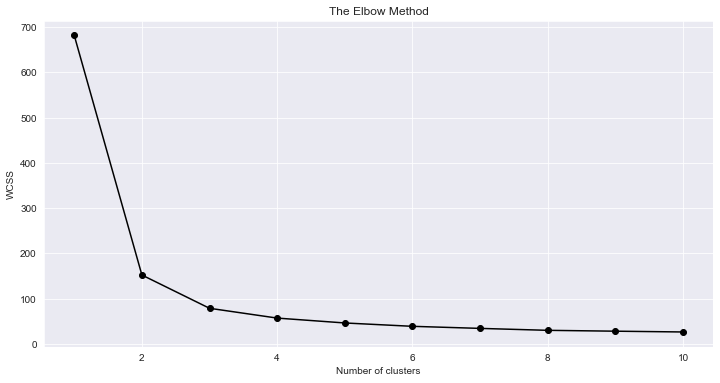

In [6]:
from sklearn.cluster import KMeans
plt.figure(figsize=(12,6))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o', color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**From above Elbow graph, the cut-off point or elbow point is at k=3. So the optimal Number of Clusters are 3**

## Training the K-Means model on the dataset

In [7]:
model=KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans=model.fit_predict(X)
print('WCSS:', model.inertia_)
print('\nCentroids:', model.cluster_centers_)
print('\nLabels:', model.labels_)

WCSS: 78.85144142614601

Centroids: [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualizing the Clusters

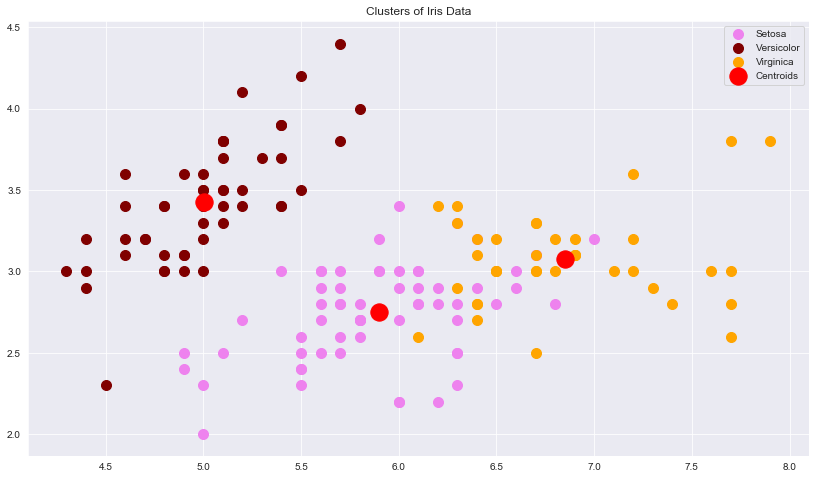

In [8]:
plt.figure(figsize=(14,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'violet', label = 'Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'maroon', label = 'Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of Iris Data')
plt.legend()